# Borderline SMOTE - Entscheidungsprozess ob ein Datenpunkt gesondert abgespeichert wird
Das Notebook veranschaulicht mit einer Abbildung, wie der Entscheidungsprozess zur Abspeicherung eines Datenpunktes der Minderheit abläuft, um dann aus den abgespeicherten Datenpunkten neue synthetische Datenpunkte zu generieren. Der verwendete Source Code ist eine leichte Modifikation des Source Codes, welcher unter folgendem Link zu finden ist: <https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_illustration_generation_sample.html> .
DIe Modifikationen beschränken sich hierbei auf eine deutsche Übersetzung, das Einführen einer Funktion zum Abspeichern der Abbildung, das Abändern der Variablennamen, das Verschieben eines Datenpunktes, das Entfernen einer Verbindungslinie, das Abändern der Beschreibung, die Änderung der Klassenzugehörigkeit eines Datenpunktes und das Einführen unterschiedlicher Symbole für Datenpunkte die zu einer Klasse gehören.

In [1]:
# Importierung des Moduls os
import os

# Erstellung eines Speicherort für die Graphen
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "os_bsp_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Funktion zur Abspeicherung von Bildern.
# fig_id legt den Namen des abgespeicherten Bildes fest.
# tight_layout passt automatisch die Größe mehrerer untergeordneter Graphen an, damit diese sich nicht überschneiden.
# fig_extension legt den Datentyp des abgespeicherten Bildes fest.
# resolution bestimmt die Auflösung des Bildes.
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
%matplotlib inline


In diesem Beispiel wird illustriert, welche Bedingungen vorliegen müssen, damit ein Datenpunkt als erzeugender Punkt abgespeichert wird.


Automatically created module for IPython interactive environment
Saving figure SMOTE_vis_bsm_m


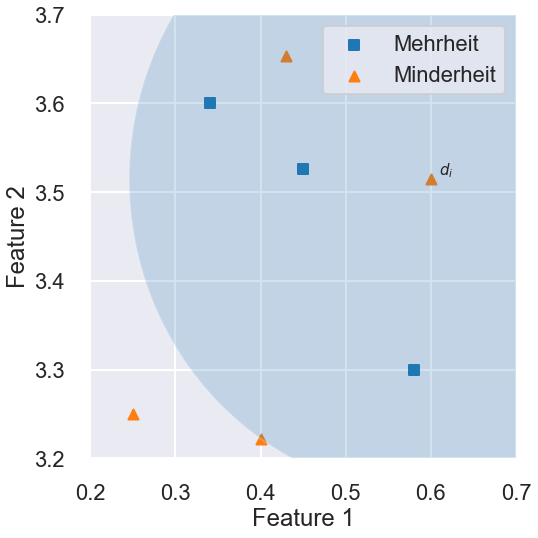

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

rng = np.random.RandomState(18)

f, ax = plt.subplots(figsize=(8, 8))

# Datenpunkte generieren.
y = np.array([3.65284, 3.25, 3.51468, 3.22199])
z = np.array([0.43, 0.25, 0.6, 0.4])
y_2 = np.array([3.3, 3.52623, 3.6])
z_2 = np.array([0.58, 0.45, 0.34])

# Die Datenpunkte der Mehrheit und die der Minderheit anzeigen.
ax.scatter(z_2, y_2, label="Mehrheit", s=100, marker='s')
ax.scatter(z, y, label="Minderheit", s=100, marker='^')

idx = rng.randint(len(y), size=2)
annotation = [r"$d_i$"]

for a, i in zip(annotation, idx):
    ax.annotate(a, (z[i], y[i]), xytext=tuple([z[i] + 0.01, y[i] + 0.005]), fontsize=15)

# Einen Kreis malen, in welchem die Nachbarn des Datenpunktes liegen.
radius = np.sqrt((z[2] - z[3]) ** 2 + (y[2] - y[3]) ** 2)
circle = plt.Circle((z[2], y[2]), radius=radius, alpha=0.2)
ax.add_artist(circle)


# Beschriftungen an die Grafik anfügen.
sns.despine(ax=ax, offset=10)
ax.set_xlim([0.2, 0.7])
ax.set_ylim([3.2, 3.7])
plt.xlabel(r"Feature 1")
plt.ylabel(r"Feature 2")
plt.legend()
plt.tight_layout()
save_fig('SMOTE_vis_bsm_m')
plt.show()

Da drei der Nachbarn des betrachteten Datenpunktes d_i der Mehrheit angehören, wird dieser gesondert abgespeichert. Aus diesen gesondert abgespeicherten Datenpunkten werden dann auf die Art von SMOTE neue Datenpunkte generiert.